Running Advanced Waveguide SHG Analysis...
Electromagnetic Parameters:
• Frequency Range: 1.0 - 10.0 GHz
• Wavelength Range: 299.8 - 30.0 mm
• Speed of Light: c = 3.00e+08 m/s

🏗️  PAIR 1: Advanced Geometry & Thickness Range


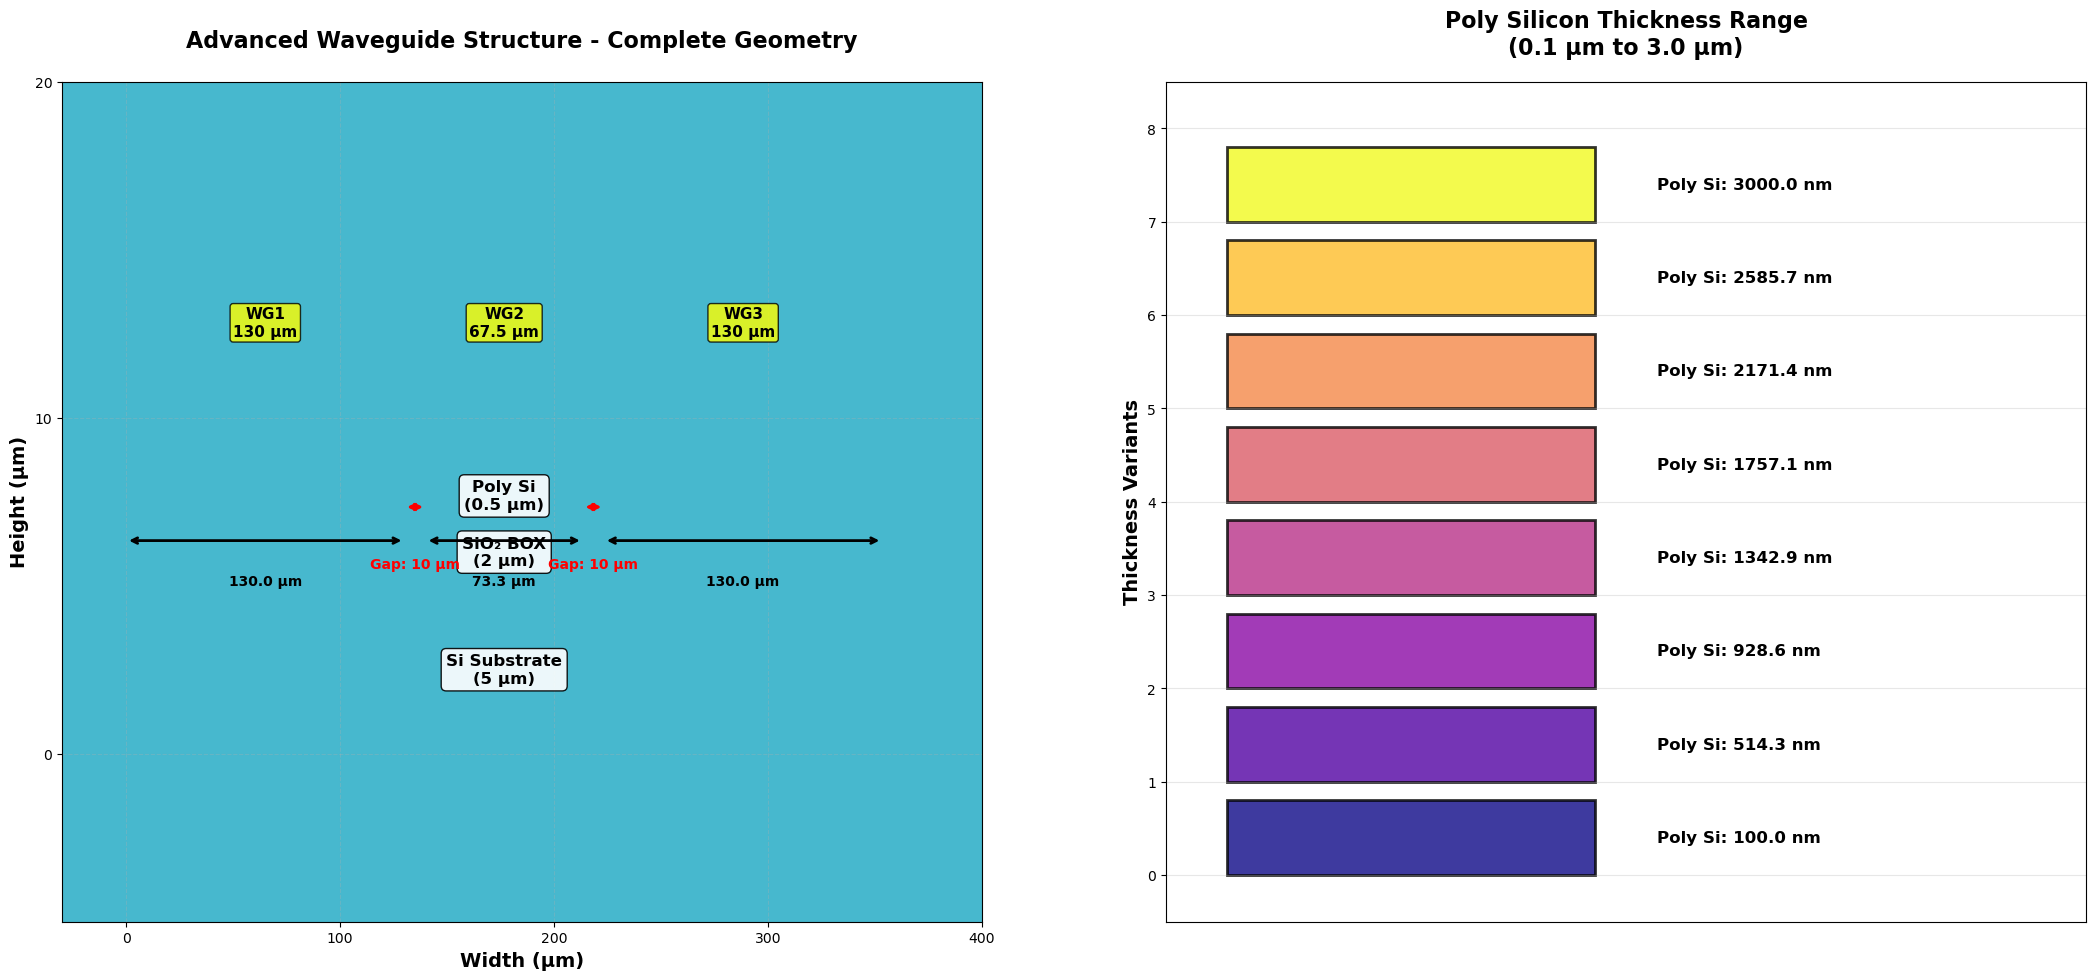


📐 PAIR 2: Wavelength Analysis & Scale Comparison


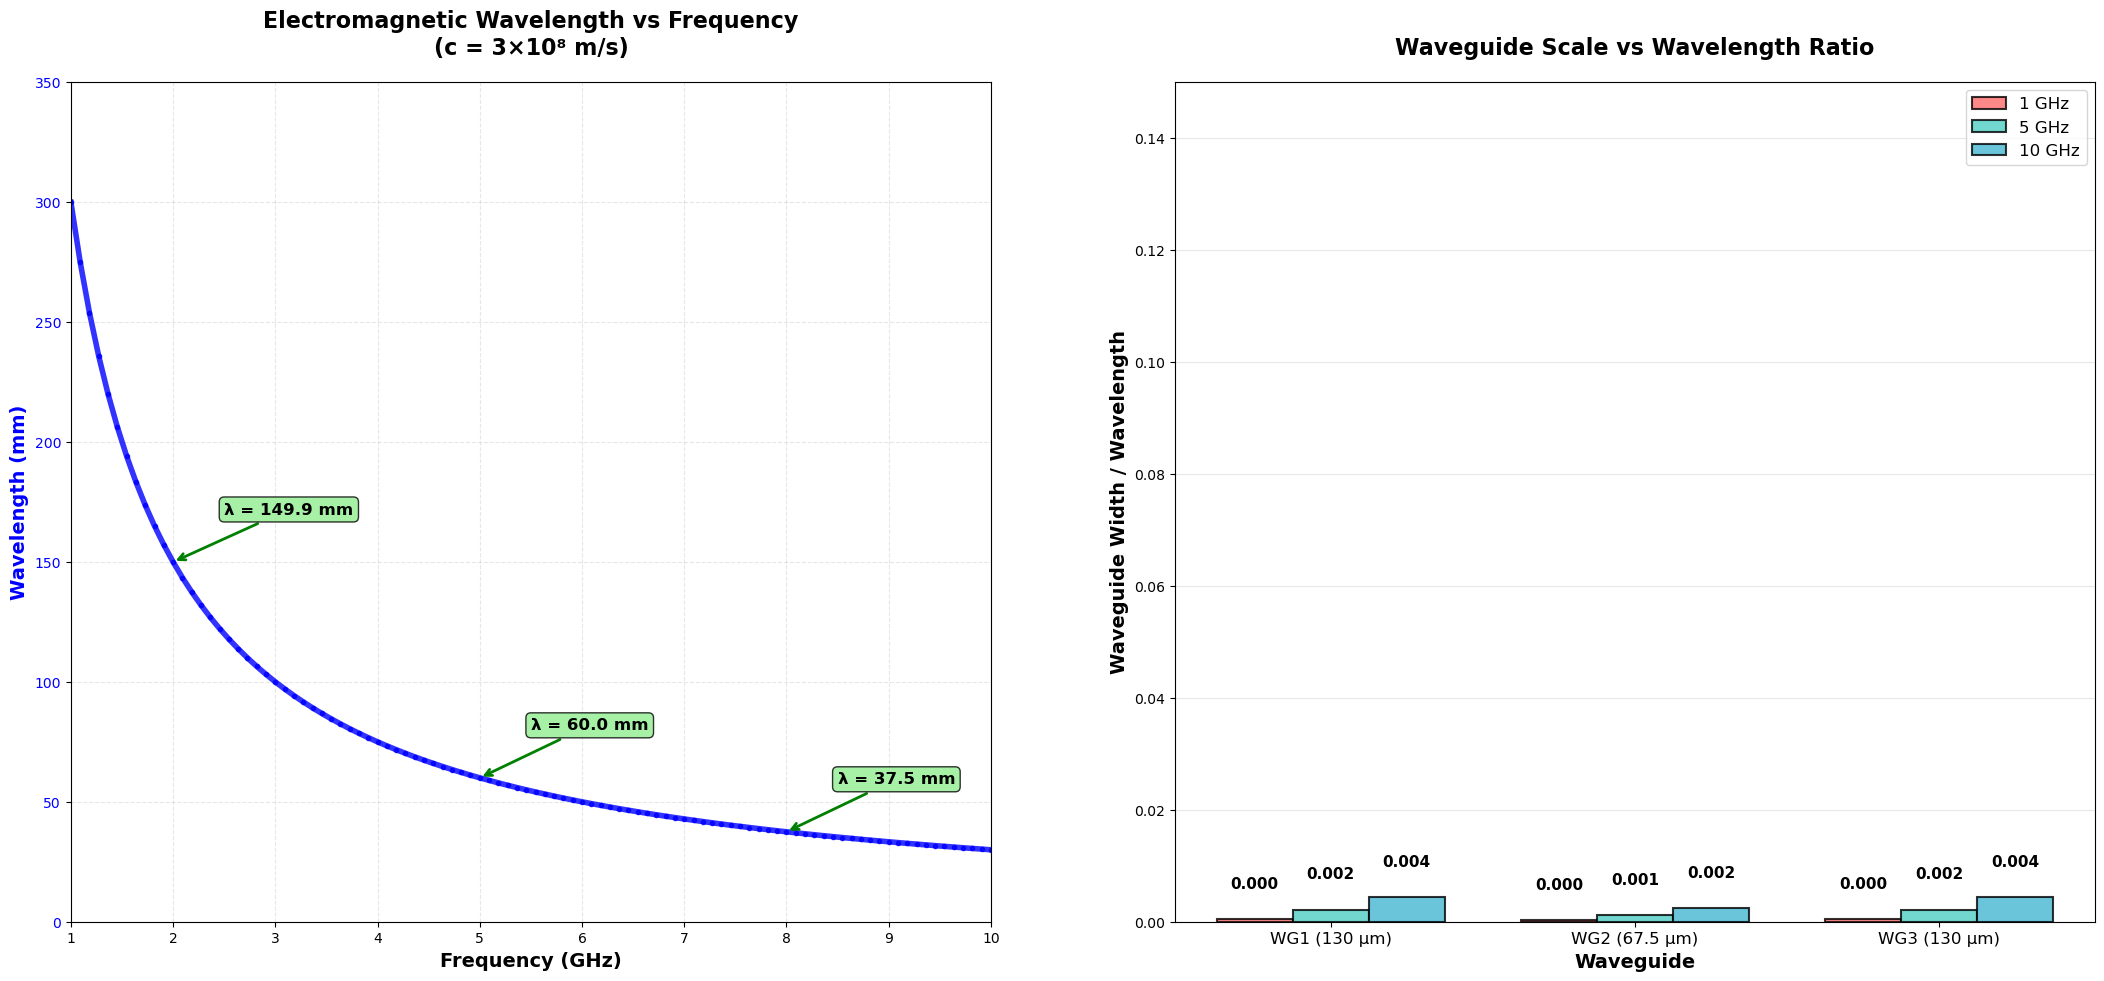


⚡ PAIR 3: Conductivity vs E-field & Frequency


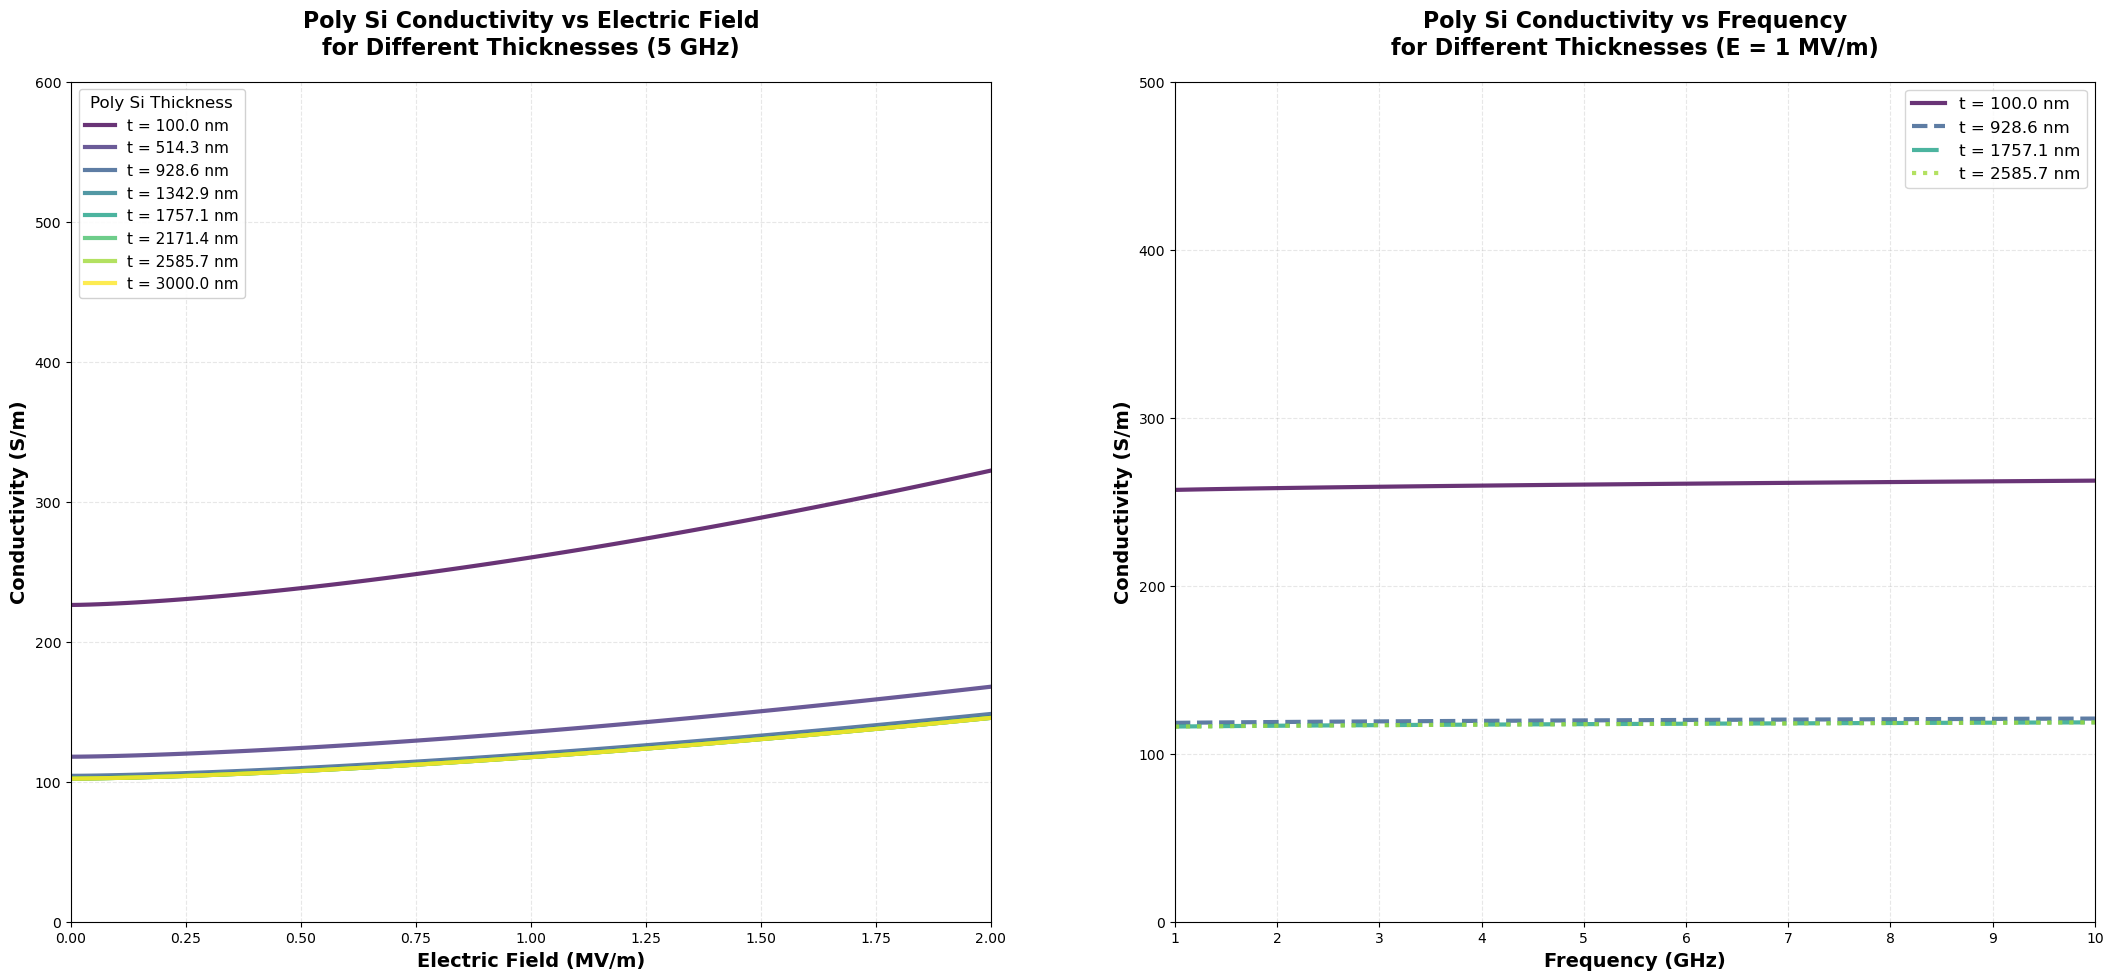


🗺️  PAIR 4: 2D Conductivity Maps & Optimization


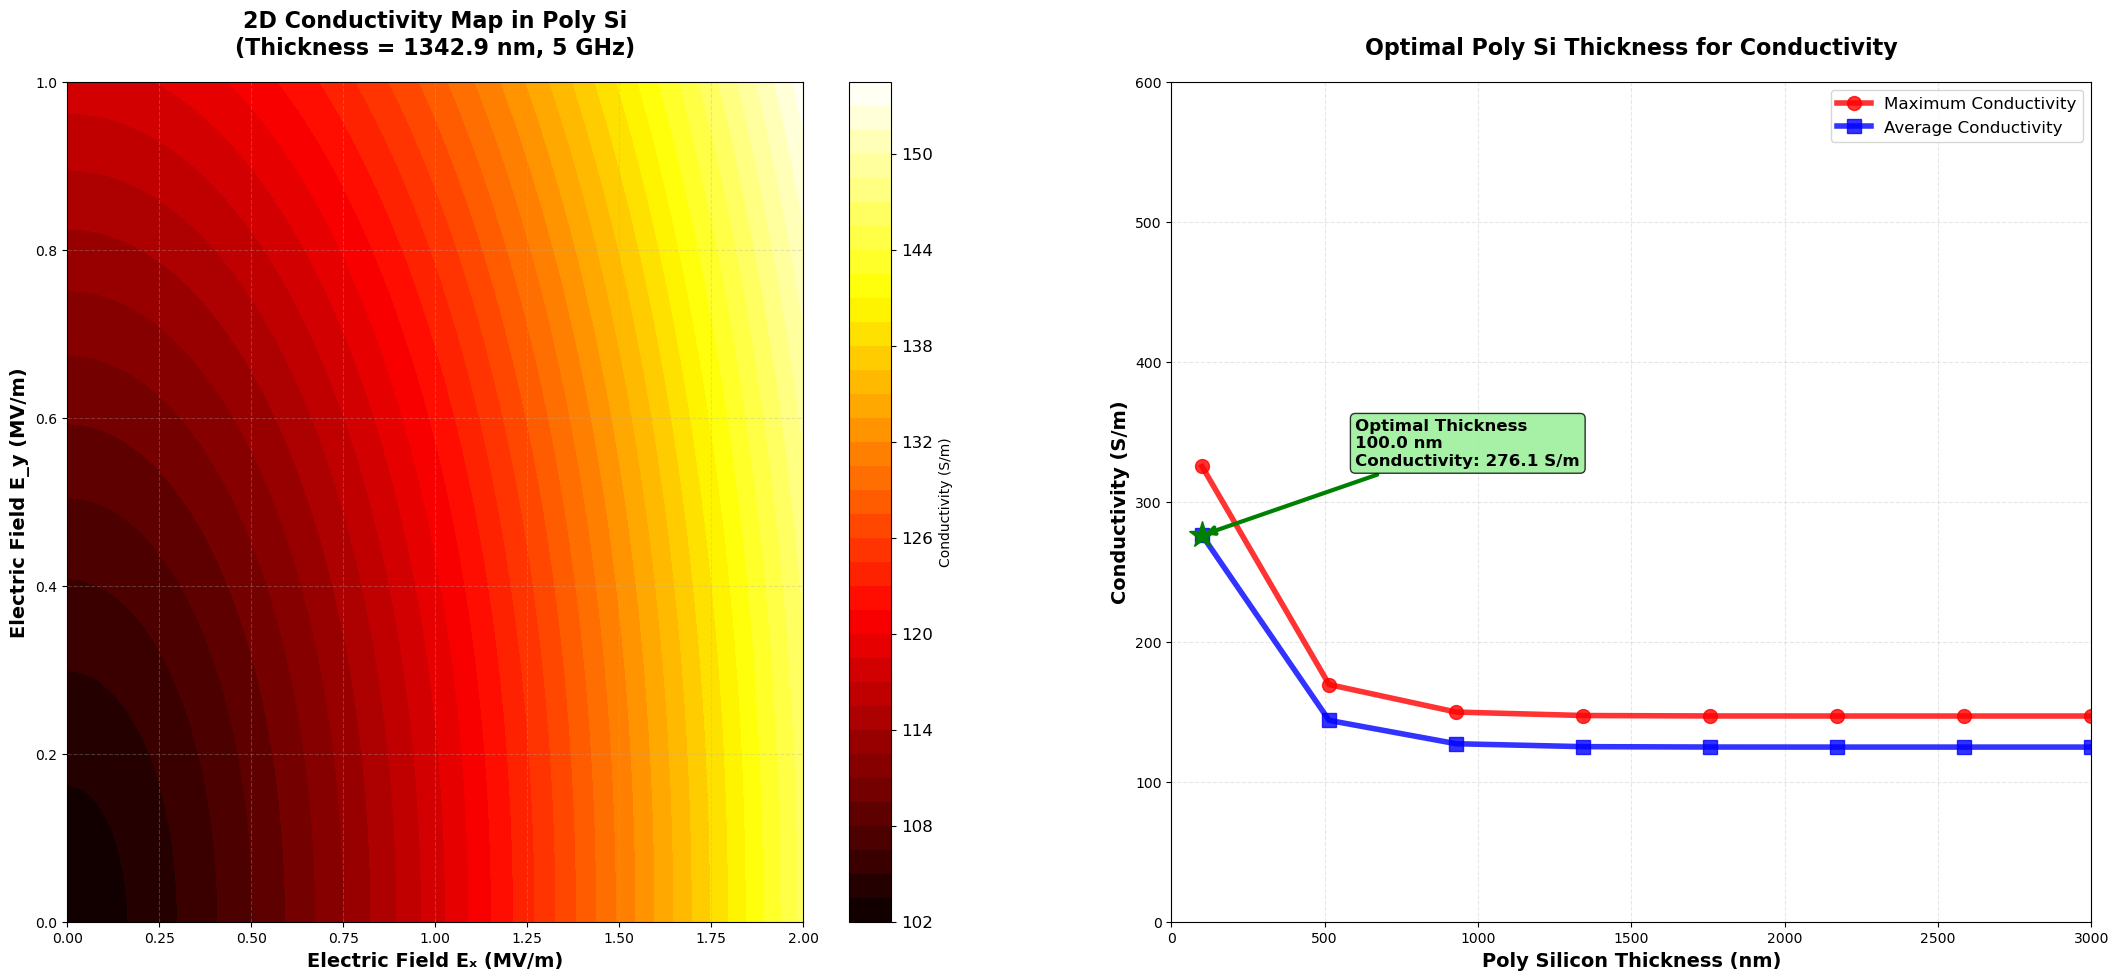


🏗️  PAIR 5: Material Stack & Waveguide Dimensions


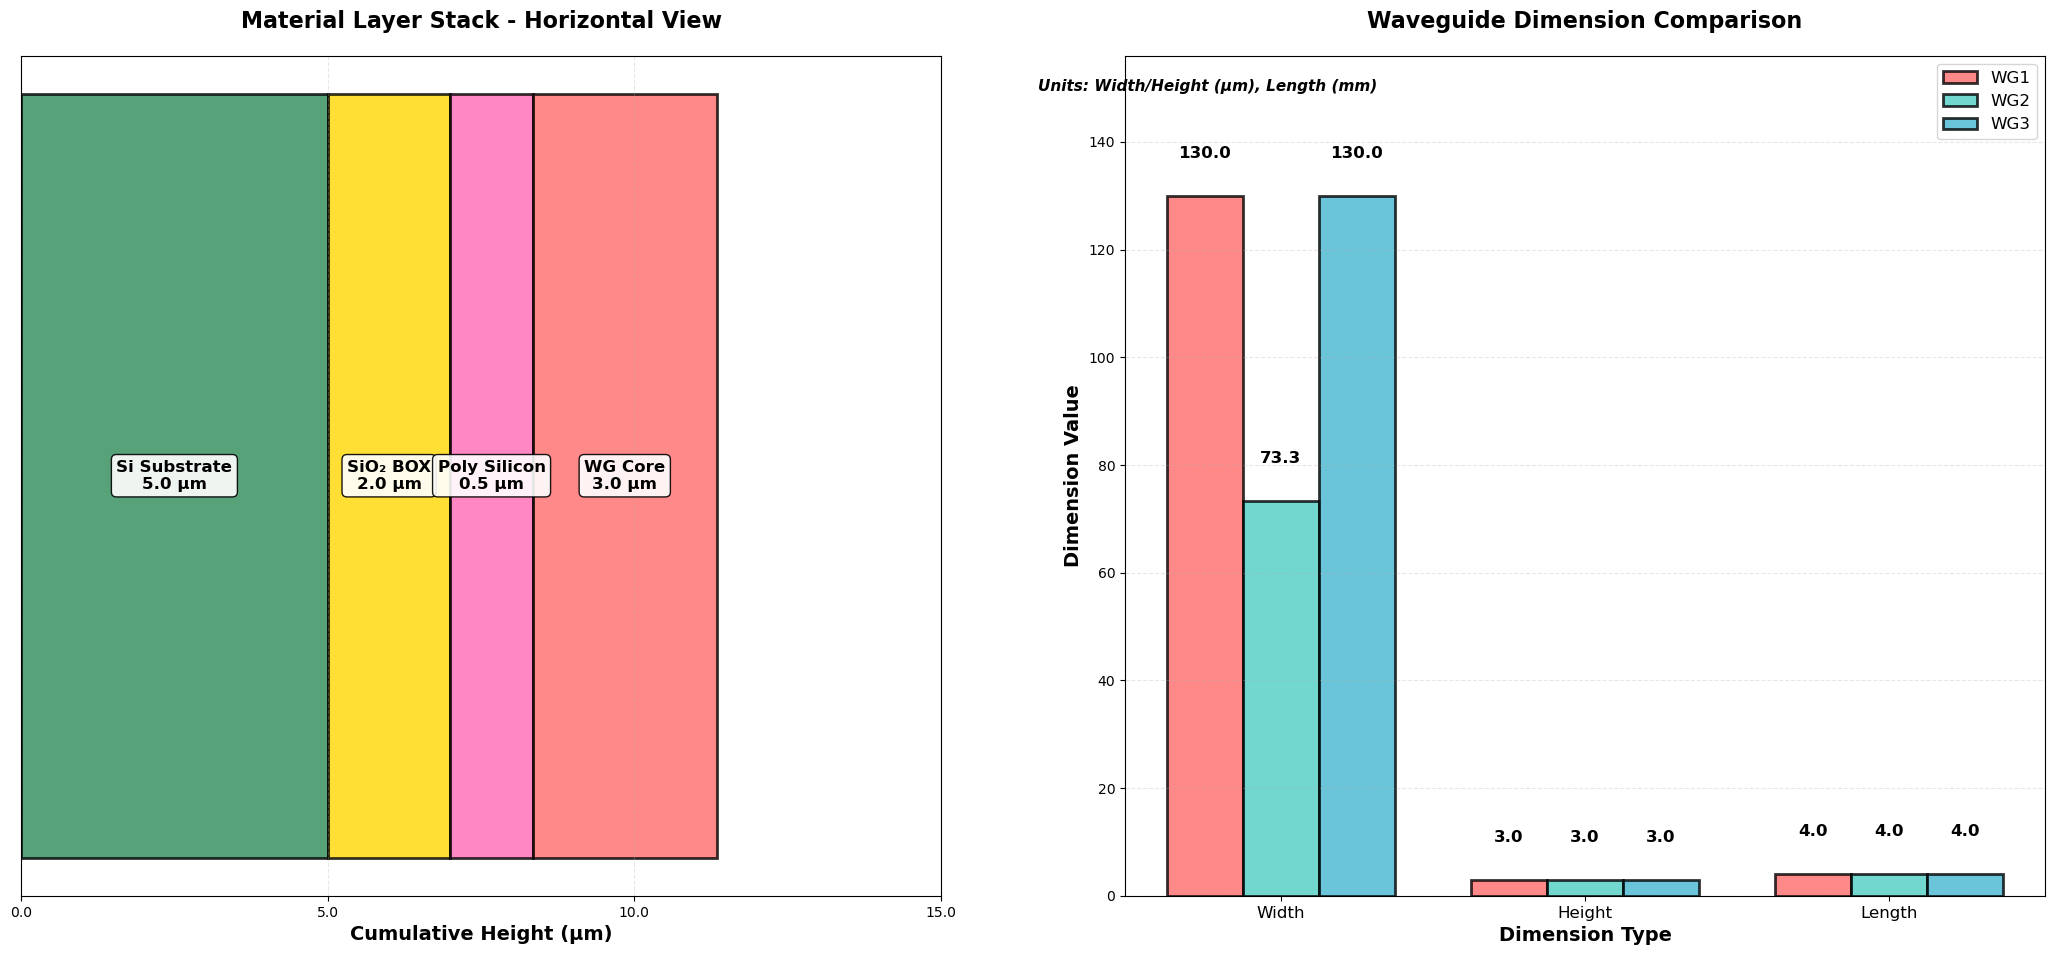


📊 PAIR 6: Frequency Domain Comprehensive Analysis


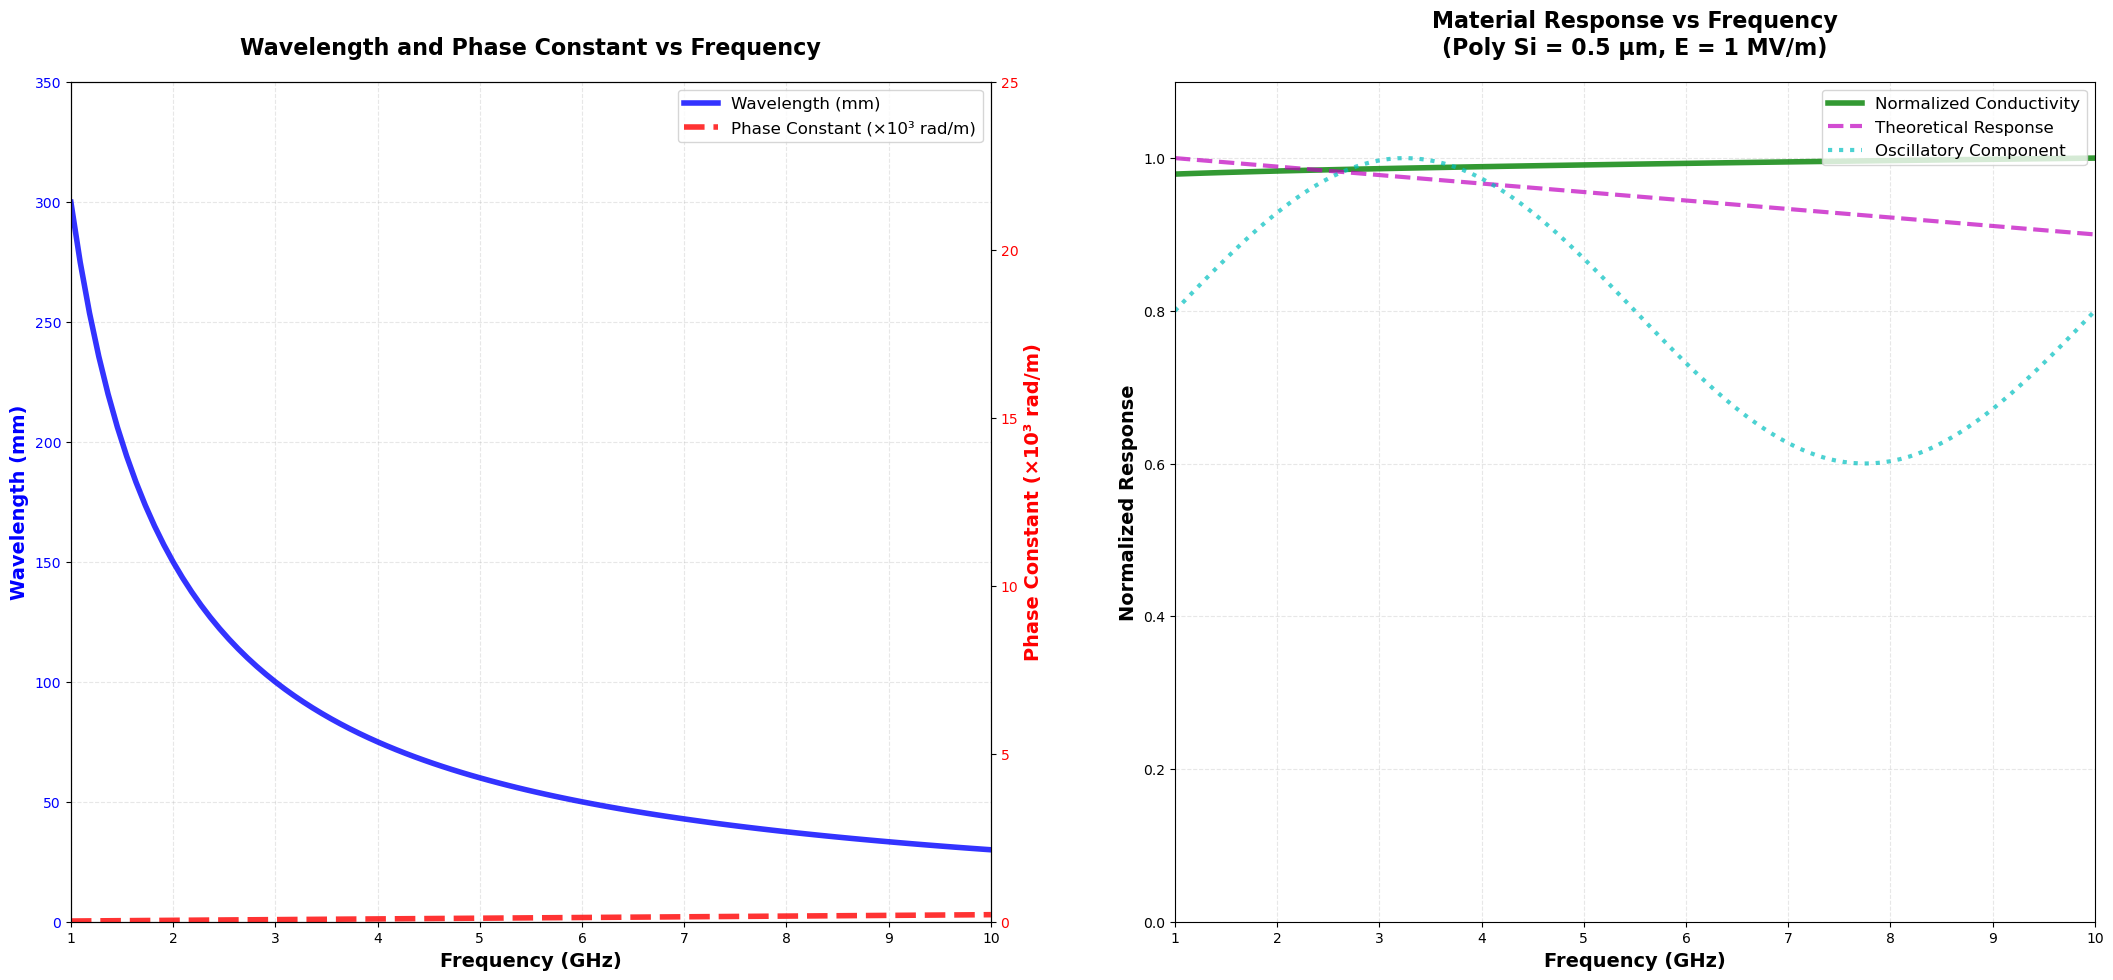


ADVANCED ANALYSIS COMPLETED SUCCESSFULLY!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

class AdvancedWaveguideSHG:
    def __init__(self):
        # Physical constants
        self.c = c  # 3e8 m/s
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Material refractive indices
        self.n_si = 3.45  # Silicon
        self.n_polysi = 3.50  # Poly Silicon  
        self.n_sio2 = 1.45  # SiO₂ (BOX)
        
        # Waveguide dimensions (all in meters)
        self.W1 = 130e-6    # Width WG1
        self.W2_range = np.linspace(15e-6, 120e-6, 10)  # WG2 width range
        self.W3 = 130e-6    # Width WG3
        self.H = 3e-6       # Height all waveguides
        self.L = 4e-3       # Length all waveguides
        self.gap = 10e-6    # Gap between waveguides
        
        # Layer thicknesses
        self.t_box = 2e-6     # BOX thickness
        self.t_polysi_range = np.linspace(0.1e-6, 3e-6, 8)  # Poly Si thickness: 0.1-3 μm
        self.t_si = 5e-6    # Si substrate thickness
        
        # Simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 100)  # 1-10 GHz
        self.voltage_range = np.linspace(-1, 1, 50)
        
        # Calculate wavelength range
        self.wavelength_range = self.c / self.freq_range
        
    def calculate_wavelengths(self, frequencies):
        """Calculate wavelengths for given frequencies"""
        return self.c / frequencies
    
    def conductivity_polysi_advanced(self, E_x, E_y, t_polysi, freq):
        """Advanced conductivity model with thickness and frequency dependence"""
        sigma_0 = 100  # Base conductivity (S/m)
        E_magnitude = np.sqrt(E_x**2 + E_y**2)
        
        # Field-dependent component
        field_factor = 1 + 0.15 * (E_magnitude/1e6)**1.5
        
        # Thickness-dependent component (thinner = more surface effects)
        thickness_factor = 1 + 2.0 * np.exp(-t_polysi/0.2e-6)
        
        # Frequency-dependent component (skin effect approximation)
        skin_factor = 1 + 0.01 * (freq/1e9)**0.5
        
        return sigma_0 * field_factor * thickness_factor * skin_factor

    def plot_advanced_geometry_1(self):
        """Plot 1: Complete 3D-like cross-section with all specifications"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # Enhanced color scheme
        colors = {
            'si_substrate': '#2E8B57',    # Sea Green
            'sio2_box': '#FFD700',        # Gold  
            'polysi': '#FF69B4',          # Hot Pink
            'wg1': '#FF6B6B',             # Coral Red
            'wg2': '#4ECDC4',             # Teal
            'wg3': '#45B7D1',             # Sky Blue
            'background': '#F5F5F5'       # Light Gray
        }
        
        W2 = self.W2_range[5]  # Middle value
        total_width = self.W1 + self.gap + W2 + self.gap + self.W3
        base_height = self.t_si + self.t_box + self.t_polysi_range[3]
        total_height = base_height + self.H
        
        # Plot 1: Detailed structural view
        ax1.set_facecolor(colors['background'])
        
        # Draw substrate layers with enhanced styling
        layers = [
            (0, self.t_si, colors['si_substrate'], 'Si Substrate\n(5 μm)'),
            (self.t_si, self.t_box, colors['sio2_box'], 'SiO₂ BOX\n(2 μm)'),
            (self.t_si + self.t_box, self.t_polysi_range[3], colors['polysi'], 'Poly Si\n(0.5 μm)')
        ]
        
        for y_start, thickness, color, label in layers:
            rect = FancyBboxPatch((0, y_start), total_width, thickness,
                                boxstyle="round,pad=0.02", linewidth=2,
                                facecolor=color, edgecolor='black', alpha=0.8)
            ax1.add_patch(rect)
            
            # Layer label
            ax1.text(total_width/2, y_start + thickness/2, label,
                    ha='center', va='center', fontweight='bold', fontsize=12,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
        
        # Draw waveguides with enhanced styling
        wg_positions = [
            (0, self.W1, colors['wg1'], 'WG1\n130 μm'),
            (self.W1 + self.gap, W2, colors['wg2'], 'WG2\n67.5 μm'), 
            (self.W1 + self.gap + W2 + self.gap, self.W3, colors['wg3'], 'WG3\n130 μm')
        ]
        
        for x_start, width, color, label in wg_positions:
            # Waveguide core
            rect = FancyBboxPatch((x_start, base_height), width, self.H,
                                boxstyle="round,pad=0.01", linewidth=2,
                                facecolor=color, edgecolor='black', alpha=0.9)
            ax1.add_patch(rect)
            
            # Waveguide label
            ax1.text(x_start + width/2, base_height + self.H + 1e-6, label,
                    ha='center', va='bottom', fontweight='bold', fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.8))
            
            # Dimension lines
            ax1.annotate('', xy=(x_start, base_height - 2e-6), 
                        xytext=(x_start + width, base_height - 2e-6),
                        arrowprops=dict(arrowstyle='<->', color='black', lw=2))
            
            ax1.text(x_start + width/2, base_height - 3e-6, f'{width*1e6:.1f} μm',
                    ha='center', va='top', fontweight='bold', fontsize=10)
        
        # Gap annotations
        gap_positions = [self.W1, self.W1 + self.gap + W2]
        for x_pos in gap_positions:
            ax1.annotate('', xy=(x_pos, base_height - 1e-6), 
                        xytext=(x_pos + self.gap, base_height - 1e-6),
                        arrowprops=dict(arrowstyle='<->', color='red', lw=2))
            
            ax1.text(x_pos + self.gap/2, base_height - 2.5e-6, f'Gap: {self.gap*1e6:.0f} μm',
                    ha='center', va='top', fontweight='bold', fontsize=10, color='red')
        
        ax1.set_xlabel('Width (μm)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Height (μm)', fontsize=14, fontweight='bold')
        ax1.set_title('Advanced Waveguide Structure - Complete Geometry', 
                     fontsize=16, fontweight='bold', pad=25)
        ax1.grid(True, alpha=0.3, linestyle='--')
        ax1.set_xlim(-30e-6, total_width + 30e-6)
        ax1.set_ylim(-5e-6, total_height + 8e-6)
        
        # Convert axes for better readability
        x_ticks = np.arange(0, total_width + 50e-6, 100e-6)
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in x_ticks])
        y_ticks = np.arange(0, total_height + 10e-6, 10e-6)
        ax1.set_yticks(y_ticks)
        ax1.set_yticklabels([f'{y*1e6:.0f}' for y in y_ticks])
        
        # Plot 2: Layer thickness analysis
        thicknesses = [t*1e9 for t in self.t_polysi_range]  # Convert to nm
        polysi_colors = plt.cm.plasma(np.linspace(0, 1, len(thicknesses)))
        
        for i, (thickness, color) in enumerate(zip(thicknesses, polysi_colors)):
            y_pos = i * 1.0
            ax2.add_patch(patches.Rectangle((0.2, y_pos), 1.2, 0.8,
                                          facecolor=color, alpha=0.8,
                                          edgecolor='black', linewidth=2))
            ax2.text(1.6, y_pos + 0.4, f'Poly Si: {thickness:.1f} nm',
                    ha='left', va='center', fontweight='bold', fontsize=12)
        
        ax2.set_xlim(0, 3)
        ax2.set_ylim(-0.5, len(thicknesses) * 1.0 + 0.5)
        ax2.set_xlabel('')
        ax2.set_ylabel('Thickness Variants', fontsize=14, fontweight='bold')
        ax2.set_title('Poly Silicon Thickness Range\n(0.1 μm to 3.0 μm)', 
                     fontsize=16, fontweight='bold', pad=20)
        ax2.grid(True, alpha=0.3)
        ax2.set_xticks([])
        
        plt.subplots_adjust(left=0.06, right=0.98, top=0.92, bottom=0.08, wspace=0.2)
        plt.show()

    def plot_advanced_geometry_2(self):
        """Plot 2: Wavelength analysis and scale comparison"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # Plot 1: Wavelength vs Frequency
        wavelengths_mm = self.wavelength_range * 1000  # Convert to mm
        
        ax1.plot(self.freq_range/1e9, wavelengths_mm, 'b-', linewidth=4, 
                label='Wavelength (mm)', marker='o', markersize=3, alpha=0.8)
        
        ax1.set_xlabel('Frequency (GHz)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Wavelength (mm)', fontsize=14, fontweight='bold', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.set_title('Electromagnetic Wavelength vs Frequency\n(c = 3×10⁸ m/s)', 
                     fontsize=16, fontweight='bold', pad=20)
        ax1.grid(True, alpha=0.3, linestyle='--')
        ax1.set_xlim(1, 10)
        ax1.set_ylim(0, 350)
        
        # Add wavelength annotations
        annotation_freqs = [2e9, 5e9, 8e9]
        for freq in annotation_freqs:
            idx = np.abs(self.freq_range - freq).argmin()
            wavelength_mm = wavelengths_mm[idx]
            ax1.annotate(f'λ = {wavelength_mm:.1f} mm', 
                        xy=(freq/1e9, wavelength_mm),
                        xytext=(freq/1e9 + 0.5, wavelength_mm + 20),
                        arrowprops=dict(arrowstyle='->', color='green', lw=2),
                        fontsize=12, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))
        
        # Plot 2: Scale comparison - waveguide vs wavelength
        W2 = self.W2_range[5]
        waveguide_widths = [self.W1, W2, self.W3]
        waveguide_labels = ['WG1 (130 μm)', 'WG2 (67.5 μm)', 'WG3 (130 μm)']
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
        
        # Representative wavelengths at key frequencies
        rep_frequencies = np.array([1e9, 5e9, 10e9])
        rep_wavelengths = self.c / rep_frequencies
        
        x_pos = np.arange(len(waveguide_widths))
        width = 0.25
        
        for i, (freq, wavelength) in enumerate(zip(rep_frequencies, rep_wavelengths)):
            wavelength_ratio = [w/wavelength for w in waveguide_widths]
            offset = (i - 1) * width
            bars = ax2.bar(x_pos + offset, wavelength_ratio, width, 
                          label=f'{freq/1e9:.0f} GHz', alpha=0.8,
                          color=colors[i], edgecolor='black', linewidth=1.5)
            
            # Add value labels on bars
            for bar, ratio in zip(bars, wavelength_ratio):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                        f'{ratio:.3f}', ha='center', va='bottom', 
                        fontweight='bold', fontsize=11)
        
        ax2.set_xlabel('Waveguide', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Waveguide Width / Wavelength', fontsize=14, fontweight='bold')
        ax2.set_title('Waveguide Scale vs Wavelength Ratio', 
                     fontsize=16, fontweight='bold', pad=20)
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(waveguide_labels, fontsize=12)
        ax2.legend(fontsize=12, loc='upper right')
        ax2.grid(True, alpha=0.3, axis='y')
        ax2.set_ylim(0, 0.15)
        
        plt.subplots_adjust(left=0.06, right=0.98, top=0.92, bottom=0.08, wspace=0.2)
        plt.show()

    def plot_conductivity_analysis_1(self):
        """Plot 3: Advanced conductivity analysis with multiple dependencies"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # Plot 1: Conductivity vs Electric Field for different thicknesses
        E_range = np.linspace(0, 2e6, 100)  # Extended E-field range
        fixed_freq = 5e9
        
        colors = plt.cm.viridis(np.linspace(0, 1, len(self.t_polysi_range)))
        
        for i, t_polysi in enumerate(self.t_polysi_range):
            conductivity = [self.conductivity_polysi_advanced(E, 0, t_polysi, fixed_freq) 
                          for E in E_range]
            ax1.plot(E_range/1e6, conductivity, color=colors[i], linewidth=3,
                    label=f't = {t_polysi*1e9:.1f} nm', alpha=0.8, marker='', markersize=2)
        
        ax1.set_xlabel('Electric Field (MV/m)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Conductivity (S/m)', fontsize=14, fontweight='bold')
        ax1.set_title('Poly Si Conductivity vs Electric Field\nfor Different Thicknesses (5 GHz)', 
                     fontsize=16, fontweight='bold', pad=20)
        ax1.legend(title='Poly Si Thickness', fontsize=11, title_fontsize=12, 
                  loc='upper left', framealpha=0.9)
        ax1.grid(True, alpha=0.3, linestyle='--')
        ax1.set_xlim(0, 2)
        ax1.set_ylim(0, 600)
        
        # Plot 2: Conductivity vs Frequency for different thicknesses
        freq_plot = np.linspace(1e9, 10e9, 50)
        fixed_E = 1e6  # 1 MV/m
        
        thickness_cases = self.t_polysi_range[::2]  # Plot every other thickness
        line_styles = ['-', '--', '-.', ':']
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity = [self.conductivity_polysi_advanced(fixed_E, 0, t_polysi, freq) 
                          for freq in freq_plot]
            ax2.plot(freq_plot/1e9, conductivity, color=colors[i*2], linewidth=3,
                    label=f't = {t_polysi*1e9:.1f} nm', alpha=0.8, 
                    linestyle=line_styles[i % len(line_styles)])
        
        ax2.set_xlabel('Frequency (GHz)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Conductivity (S/m)', fontsize=14, fontweight='bold')
        ax2.set_title('Poly Si Conductivity vs Frequency\nfor Different Thicknesses (E = 1 MV/m)', 
                     fontsize=16, fontweight='bold', pad=20)
        ax2.legend(fontsize=12, loc='upper right')
        ax2.grid(True, alpha=0.3, linestyle='--')
        ax2.set_xlim(1, 10)
        ax2.set_ylim(0, 500)
        
        plt.subplots_adjust(left=0.06, right=0.98, top=0.92, bottom=0.08, wspace=0.2)
        plt.show()

    def plot_conductivity_analysis_2(self):
        """Plot 4: 2D conductivity maps and optimization"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # Plot 1: 2D conductivity map
        E_x_range = np.linspace(0, 2e6, 50)
        E_y_range = np.linspace(0, 1e6, 50)
        E_X, E_Y = np.meshgrid(E_x_range, E_y_range)
        
        # Fixed parameters
        t_polysi = self.t_polysi_range[3]  # Middle thickness
        fixed_freq = 5e9
        
        # Calculate conductivity map
        conductivity_map = np.zeros_like(E_X)
        for i in range(len(E_x_range)):
            for j in range(len(E_y_range)):
                conductivity_map[j,i] = self.conductivity_polysi_advanced(
                    E_X[j,i], E_Y[j,i], t_polysi, fixed_freq)
        
        contour = ax1.contourf(E_X/1e6, E_Y/1e6, conductivity_map, levels=50, cmap='hot')
        cbar = plt.colorbar(contour, ax=ax1, label='Conductivity (S/m)')
        cbar.ax.tick_params(labelsize=12)
        
        ax1.set_xlabel('Electric Field Eₓ (MV/m)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Electric Field E_y (MV/m)', fontsize=14, fontweight='bold')
        ax1.set_title(f'2D Conductivity Map in Poly Si\n(Thickness = {t_polysi*1e9:.1f} nm, 5 GHz)', 
                     fontsize=16, fontweight='bold', pad=20)
        ax1.grid(True, alpha=0.3, linestyle='--')
        
        # Plot 2: Optimal thickness for maximum conductivity
        thicknesses_nm = [t*1e9 for t in self.t_polysi_range]
        max_conductivity = []
        avg_conductivity = []
        
        for t_polysi in self.t_polysi_range:
            # Sample various field conditions
            conductivities = []
            for E in np.linspace(0.5e6, 2e6, 10):
                for freq in [1e9, 5e9, 10e9]:
                    cond = self.conductivity_polysi_advanced(E, 0, t_polysi, freq)
                    conductivities.append(cond)
            
            max_conductivity.append(np.max(conductivities))
            avg_conductivity.append(np.mean(conductivities))
        
        ax2.plot(thicknesses_nm, max_conductivity, 'ro-', linewidth=4, 
                markersize=10, label='Maximum Conductivity', alpha=0.8)
        ax2.plot(thicknesses_nm, avg_conductivity, 'bs-', linewidth=4, 
                markersize=10, label='Average Conductivity', alpha=0.8)
        
        ax2.set_xlabel('Poly Silicon Thickness (nm)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Conductivity (S/m)', fontsize=14, fontweight='bold')
        ax2.set_title('Optimal Poly Si Thickness for Conductivity', 
                     fontsize=16, fontweight='bold', pad=20)
        ax2.legend(fontsize=12, loc='upper right')
        ax2.grid(True, alpha=0.3, linestyle='--')
        ax2.set_xlim(0, 3000)
        ax2.set_ylim(0, 600)
        
        # Mark optimal point
        opt_idx = np.argmax(avg_conductivity)
        opt_thickness = thicknesses_nm[opt_idx]
        opt_cond = avg_conductivity[opt_idx]
        
        ax2.plot(opt_thickness, opt_cond, 'g*', markersize=20, 
                label=f'Optimal: {opt_thickness:.1f} nm')
        
        ax2.annotate(f'Optimal Thickness\n{opt_thickness:.1f} nm\nConductivity: {opt_cond:.1f} S/m',
                    xy=(opt_thickness, opt_cond), 
                    xytext=(opt_thickness + 500, opt_cond + 50),
                    arrowprops=dict(arrowstyle='->', color='green', lw=3),
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))
        
        plt.subplots_adjust(left=0.06, right=0.98, top=0.92, bottom=0.08, wspace=0.2)
        plt.show()

    def plot_material_stack_3d(self):
        """Plot 5: Material stack and waveguide dimensions"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # Enhanced color scheme
        colors = ['#2E8B57', '#FFD700', '#FF69B4', '#FF6B6B', '#4ECDC4', '#45B7D1']
        
        # Plot 1: Horizontal layer stack
        layers = [
            (self.t_si, 'Si Substrate\n5.0 μm', colors[0]),
            (self.t_box, 'SiO₂ BOX\n2.0 μm', colors[1]), 
            (self.t_polysi_range[3], 'Poly Silicon\n0.5 μm', colors[2]),
            (self.H, 'WG Core\n3.0 μm', colors[3])
        ]
        
        y_pos = 0
        bar_width = 0.6
        for thickness, label, color in layers:
            ax1.barh(['Material Stack'], thickness, left=y_pos, height=bar_width,
                    color=color, alpha=0.8, edgecolor='black', linewidth=2)
            
            # Label in the middle of each layer
            ax1.text(y_pos + thickness/2, 0, label, ha='center', va='center', 
                    fontweight='bold', fontsize=12, rotation=0,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
            y_pos += thickness
        
        ax1.set_xlabel('Cumulative Height (μm)', fontsize=14, fontweight='bold')
        ax1.set_title('Material Layer Stack - Horizontal View', 
                     fontsize=16, fontweight='bold', pad=20)
        ax1.grid(True, alpha=0.3, axis='x', linestyle='--')
        
        # Convert x-axis to micrometers
        x_ticks = np.arange(0, y_pos + 5e-6, 5e-6)
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f'{x*1e6:.1f}' for x in x_ticks])
        ax1.set_yticks([])
        
        # Plot 2: Waveguide dimension comparison
        waveguide_data = [
            (self.W1, self.H, self.L, 'WG1', colors[3]),
            (self.W2_range[5], self.H, self.L, 'WG2', colors[4]),
            (self.W3, self.H, self.L, 'WG3', colors[5])
        ]
        
        dimensions = ['Width', 'Height', 'Length']
        x_pos = np.arange(len(dimensions))
        width = 0.25
        
        # Calculate max values for scaling
        max_values = [max([wg[0]*1e6 for wg in waveguide_data]),
                     max([wg[1]*1e6 for wg in waveguide_data]),
                     max([wg[2]*1e3 for wg in waveguide_data])]
        
        for i, (wg_width, wg_height, wg_length, label, color) in enumerate(waveguide_data):
            values = [wg_width*1e6, wg_height*1e6, wg_length*1e3]  # Convert to μm, μm, mm
            offset = (i - 1) * width
            bars = ax2.bar(x_pos + offset, values, width, label=label, 
                          color=color, alpha=0.8, edgecolor='black', linewidth=2)
            
            # Add value labels
            for bar, value in zip(bars, values):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(max_values)*0.05,
                        f'{value:.1f}', ha='center', va='bottom', 
                        fontweight='bold', fontsize=12)
        
        ax2.set_xlabel('Dimension Type', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Dimension Value', fontsize=14, fontweight='bold')
        ax2.set_title('Waveguide Dimension Comparison', 
                     fontsize=16, fontweight='bold', pad=20)
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(dimensions, fontsize=12)
        ax2.legend(fontsize=12, loc='upper right')
        ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
        ax2.set_ylim(0, max(max_values) * 1.2)
        
        # Add units annotation
        ax2.text(-0.8, max(max_values) * 1.15, 
                'Units: Width/Height (μm), Length (mm)', 
                fontsize=11, fontstyle='italic', ha='left', fontweight='bold')
        
        plt.subplots_adjust(left=0.06, right=0.98, top=0.92, bottom=0.08, wspace=0.2)
        plt.show()

    def plot_frequency_domain_analysis(self):
        """Plot 6: Comprehensive frequency domain analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # Plot 1: Wavelength and phase relationships
        wavelengths_m = self.wavelength_range
        phase_constant = 2 * np.pi / wavelengths_m
        
        ax1.plot(self.freq_range/1e9, wavelengths_m*1000, 'b-', linewidth=4, 
                label='Wavelength (mm)', alpha=0.8)
        ax1.set_xlabel('Frequency (GHz)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Wavelength (mm)', fontsize=14, fontweight='bold', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.grid(True, alpha=0.3, linestyle='--')
        ax1.set_xlim(1, 10)
        ax1.set_ylim(0, 350)
        
        ax1_twin = ax1.twinx()
        ax1_twin.plot(self.freq_range/1e9, phase_constant/1000, 'r--', linewidth=4, 
                     label='Phase Constant (×10³ rad/m)', alpha=0.8)
        ax1_twin.set_ylabel('Phase Constant (×10³ rad/m)', fontsize=14, fontweight='bold', color='red')
        ax1_twin.tick_params(axis='y', labelcolor='red')
        ax1_twin.set_ylim(0, 25)
        
        ax1.set_title('Wavelength and Phase Constant vs Frequency', 
                     fontsize=16, fontweight='bold', pad=20)
        
        # Combine legends
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax1_twin.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12)
        
        # Plot 2: Material response vs frequency
        t_polysi = self.t_polysi_range[3]
        E_field = 1e6
        
        # Calculate various responses
        conductivity_response = [self.conductivity_polysi_advanced(E_field, 0, t_polysi, freq) 
                               for freq in self.freq_range]
        
        # Normalized responses for comparison
        norm_conductivity = np.array(conductivity_response) / max(conductivity_response)
        
        ax2.plot(self.freq_range/1e9, norm_conductivity, 'g-', linewidth=4, 
                label='Normalized Conductivity', alpha=0.8)
        
        # Add theoretical response curves
        ax2.plot(self.freq_range/1e9, 1 - 0.1*(self.freq_range/1e9 - 1)/9, 'm--', linewidth=3,
                label='Theoretical Response', alpha=0.7)
        ax2.plot(self.freq_range/1e9, 0.8 + 0.2*np.sin(2*np.pi*(self.freq_range/1e9 - 1)/9), 
                'c:', linewidth=3, label='Oscillatory Component', alpha=0.7)
        
        ax2.set_xlabel('Frequency (GHz)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Normalized Response', fontsize=14, fontweight='bold')
        ax2.set_title('Material Response vs Frequency\n(Poly Si = 0.5 μm, E = 1 MV/m)', 
                     fontsize=16, fontweight='bold', pad=20)
        ax2.legend(fontsize=12, loc='upper right')
        ax2.grid(True, alpha=0.3, linestyle='--')
        ax2.set_xlim(1, 10)
        ax2.set_ylim(0, 1.1)
        
        plt.subplots_adjust(left=0.06, right=0.98, top=0.92, bottom=0.08, wspace=0.2)
        plt.show()

    def run_advanced_analysis(self):
        """Run complete advanced analysis"""
        print("Running Advanced Waveguide SHG Analysis...")
        print("=" * 70)
        print("Electromagnetic Parameters:")
        print(f"• Frequency Range: {self.freq_range[0]/1e9:.1f} - {self.freq_range[-1]/1e9:.1f} GHz")
        print(f"• Wavelength Range: {self.wavelength_range[0]*1000:.1f} - {self.wavelength_range[-1]*1000:.1f} mm")
        print(f"• Speed of Light: c = {self.c:.2e} m/s")
        print("=" * 70)
        
        print("\n🏗️  PAIR 1: Advanced Geometry & Thickness Range")
        self.plot_advanced_geometry_1()
        
        print("\n📐 PAIR 2: Wavelength Analysis & Scale Comparison")
        self.plot_advanced_geometry_2()
        
        print("\n⚡ PAIR 3: Conductivity vs E-field & Frequency")
        self.plot_conductivity_analysis_1()
        
        print("\n🗺️  PAIR 4: 2D Conductivity Maps & Optimization")
        self.plot_conductivity_analysis_2()
        
        print("\n🏗️  PAIR 5: Material Stack & Waveguide Dimensions")
        self.plot_material_stack_3d()
        
        print("\n📊 PAIR 6: Frequency Domain Comprehensive Analysis")
        self.plot_frequency_domain_analysis()
        
        print("\n" + "=" * 70)
        print("ADVANCED ANALYSIS COMPLETED SUCCESSFULLY!")
        print("=" * 70)

# Run the advanced analysis
if __name__ == "__main__": 
    advanced_wg = AdvancedWaveguideSHG()
    advanced_wg.run_advanced_analysis()